In [1]:
import json
import numpy as np
import pandas as pd
from IPython.display import display_html

In [2]:
with open('results/clr-test-predictions-w-snippetId.json', 'r') as f:
    clr_predictions = json.load(f)

In [3]:
with open('results/supmmd_test_predictions-w-snippetId.json', 'r') as f:
    supmmd_predictions = json.load(f)

In [4]:
with open('../baseline/results/baseline-test-predictions-w-snippetId.json', 'r') as f:
    baseline_predictions = json.load(f)

In [5]:
def snippet_id(arg_id, query, approach):
    data = f'{arg_id}+{query}+{approach}'
    # Standard Base64 Encoding
    encodedBytes = base64.b64encode(data.encode("utf-8"))
    encodedStr = str(encodedBytes, "utf-8")

    #print(encodedStr)
    return encodedStr
    #decodedBytes = base64.b64decode(encodedStr.encode('utf-8'))
    #decodedStr = str(decodedBytes, 'utf-8')
    #print(decodedStr)

In [83]:
for a in clr_predictions:
    a['snippet_id'] = snippet_id(a['arg_id'], a['query'], 'clr')
with open('results/clr-test-predictions-w-snippetId.json', 'w') as f:
    json.dump(clr_predictions, f)
    
for a in supmmd_predictions:
    a['snippet_id'] = snippet_id(a['arg_id'], a['query'], 'supmmd')
with open('results/supmmd_test_predictions-w-snippetId.json', 'w') as f:
    json.dump(supmmd_predictions, f)

for a in baseline_predictions:
    a['snippet_id'] = snippet_id(a['arg_id'], a['query'], 'baseline')    
with open('../baseline/results/baseline-test-predictions-w-snippetId.json', 'w') as f:
    json.dump(baseline_predictions, f)

In [6]:
with open('results/full-text-test-corpus.json', 'r') as f:
    full_text = json.load(f)

In [7]:
ids = [e['arg_id'] for e in full_text]
len(ids)

3744

In [8]:
clr_ids = set([a['arg_id'] + ' ' +a['query'] for a in clr_predictions])
supmmd_ids = set([a['arg_id'] + ' ' +a['query'] for a in supmmd_predictions])
baseline_ids = set([a['arg_id'] + ' ' +a['query'] for a in baseline_predictions])

In [13]:
print(len(clr_ids))
print(len(supmmd_ids))
print(len(baseline_ids))

3282
3282
3282


In [14]:
clr_predictions = list(filter(lambda a: a['arg_id'] + ' ' +a['query'] in baseline_ids, clr_predictions))
supmmd_predictions = list(filter(lambda a: a['arg_id'] + ' ' +a['query'] in baseline_ids, supmmd_predictions))

In [11]:
all_equal = list()
any_equal = list()
none_equal = list()
for id in ids:
    sm = [a for a in supmmd_predictions if a['arg_id'] == id][0]
    cm = [a for a in clr_predictions if a['arg_id'] == id][0]
    if (sm['excerpt'][0] == cm['excerpt'][0]) and (sm['excerpt'][1] == cm['excerpt'][1]):
        all_equal.append(id)
    elif (sm['excerpt'][0] == cm['excerpt'][0]) or (sm['excerpt'][1] == cm['excerpt'][1]):
        any_equal.append(id)
    else:
        none_equal.append(id)

IndexError: list index out of range

In [12]:
print(len(all_equal))
print(len(any_equal))
print(len(none_equal))

4
12
68


# Paraphrase results

In [15]:
def print_para(id, preds):
    a = [a for a in preds if a['arg_id'] == id][0]
    html_str = f'<p style="text-align:right">{a["arg_id"]}</p><div style="border: solid black 1px; padding-left: 5px">'
    for idx, excerpt in enumerate(a['excerpt']):
        html_str += f'<span style="color:grey">{idx+1:02d} </span><span>{excerpt}</span><br>'    
    html_str += '<hr><span style="font-weight: bold;">Paraphrased versions of the first sentence:</span><br>'
    for para in a['paraphrased_1']:
        html_str += f'<span>{para}</span><br>'
    html_str += '<hr><span style="font-weight: bold;">Paraphrased versions of the second sentence:</span><br>'
    for para in a['paraphrased_2']:
        html_str += f'<span>{para}</span><br>'
        
    html_str += '<hr><span style="font-weight: bold;">Paraphrased versions of both sentences combined:</span><br>'
    for para in a['paraphrased_both']:
        html_str += f'<span>{para}</span><br>'
        
    display_html(html_str+'</p>', raw=True)

In [9]:
print_para('S5b257ac2-A4016055e', clr_predictions)
print_para('S5b257ac2-A4016055e', supmmd_predictions)

S5b257ac2-A4016055e 01 Also, I will not be giving suggestions on how to address the economic crisis. 02 At the same time, as this article shows: Paraphrased versions of the first sentence: I won't be suggesting ways to address the economic crisis. I won't be giving suggestions on how to address the economic crisis. I won't be giving suggestions on how to fix the economy. Paraphrased versions of the second sentence: This article shows that at the same time. As this article shows, at the same time. The article shows that at the same time. Paraphrased versions of both sentences combined: I won't be giving suggestions on how to address the economic crisis. I will not be giving suggestions on how to address the economic crisis. I won't be giving suggestions on how to address the crisis.

S5b257ac2-A4016055e 01 Here are my arguments for why I disagree with the statement that the ecological crisis, e.g. 02 I will simply make the case that something along these lines should be done to address the economic crisis first. Paraphrased versions of the first sentence: I disagree with the statement about the ecological crisis. I disagree with the statement that the ecological crisis is occurring. I disagree with the statement that the ecological crisis is happening. Paraphrased versions of the second sentence: I will make the case that something should be done to address the economic crisis first. I will argue that something should be done to address the economic crisis first. I will make the case that something should be done to address the economic crisis before anything else. Paraphrased versions of both sentences combined: I disagree with the statement that the ecological crisis needs to be addressed first. I disagree with the statement that the ecological crisis should be addressed first. I disagree with the statement that the ecological crisis needs to be solved first.

Joint paraphrasing changes the meaning.

In [10]:
_id ='Sedb85154-Ade6b34a4'
print_para(_id, clr_predictions)
print_para(_id, supmmd_predictions)

Sedb85154-Ade6b34a4 01 2: humans are netting 15 gigatons of carbon into the atmosphere that has no place in the carbon cycle. 02 You can't point to one location. Paraphrased versions of the first sentence: Humans are taking 15 gigatons of carbon out of the atmosphere that has no place in the carbon cycle. Humans are taking 15 gigatons of carbon into the atmosphere that has no place in the carbon cycle. Humans are taking 15 gigatons of carbon out of the atmosphere that doesn't belong in the carbon cycle. Paraphrased versions of the second sentence: You can't point to a single location. You can't point to one place. You can't point to a specific location. Paraphrased versions of both sentences combined: Humans are taking carbon out of the atmosphere that has no place in the carbon cycle. Humans are taking carbon out of the atmosphere that doesn't belong in the carbon cycle. Humans are taking carbon out of the atmosphere and putting it in the carbon cycle.

Sedb85154-Ade6b34a4 01 I would like to see logical sequential ideas that lead to the notion that climate change must be all natural. 02 Green house gasses cause global warming. Paraphrased versions of the first sentence: I would like to see sequential ideas that lead to the idea that climate change must be natural. I would like to see ideas that lead to the idea that climate change must be natural. I would like to see sequential ideas that lead to the idea that climate change is a natural phenomenon. Paraphrased versions of the second sentence: Global warming is caused by green house gasses. Green house gasses cause global warming. Green house gasses are a cause of global warming. Paraphrased versions of both sentences combined: Climate change must be all natural if logical sequential ideas are to be believed. I would like to see logical ideas that lead to the idea that climate change must be natural. I would like to see logical ideas that lead to the idea that climate change must be a natural phenomenon.

In [11]:
_id = 'S44b0e2cd-A94526f86'
print_para(_id, clr_predictions)
print_para(_id, supmmd_predictions)

S44b0e2cd-A94526f86 01 The Toyota Camry is more spacious compared to the GTR. 02 Larger vehicles often carry their mass higher off the ground. Paraphrased versions of the first sentence: The Camry is larger than the GTR. The Toyota Camry is larger than the GTR. The Toyota Camry is larger. Paraphrased versions of the second sentence: Larger vehicles carry their mass higher up. Larger vehicles can carry their mass higher up. Larger vehicles carry their mass higher up the ground. Paraphrased versions of both sentences combined: The Toyota Camry is larger than the GTR. The Toyota Camry has more space than the GTR. The Camry is larger than the GTR.

S44b0e2cd-A94526f86 01 Because of the Toyota Camry's size, it's more convenient for people who are taller in height. 02 The Toyota Camry is more spacious compared to the GTR. Paraphrased versions of the first sentence: It's more convenient for taller people to use the Toyota Camry. It's more convenient for people who are taller to use the Toyota Camry. It's more convenient for people who are taller to use the Camry. Paraphrased versions of the second sentence: The Camry is larger than the GTR. The Toyota Camry is larger than the GTR. The Toyota Camry is larger. Paraphrased versions of both sentences combined: The Toyota Camry is more convenient for taller people. The Toyota Camry is more spacious than the GTR. The Toyota Camry is more spacious than the GTR, which makes it more convenient for taller people.

In [12]:
_id = np.random.choice(ids)
print_para(_id, clr_predictions)
print_para(_id, supmmd_predictions)

S43726286-A6b0a804e 01 ladies and gentlemen my debate first of all amir khan has a more fans then preity . 02 but i agree its ur opinion. amir khan really has made more movies then preity amir khan has made :tera zameen per, and way more but i don't know how to spell urda next i am not saying preity is ugly i am saying that she has poor profermonce. preity is a talented actress but it is her fans that are letting her down. Paraphrased versions of the first sentence: First of all, amir khan has more fans than preity. First of all, amir khan has more fans than preity, so I'm not going to debate him. First of all, amir khan has more fans then preity, so I'm not going to debate him. Paraphrased versions of the second sentence: I agree that amir khan has made more movies than preity, but I don't know how to spell it. I agree that amir khan has made more movies than preity, but I don't know how to spell urda. I agree that amir khan has made more movies then preity, but I don't know how to spell it. Paraphrased versions of both sentences combined: I agree with you that amir khan has more fans than preity. I agree with you that amir khan has more fans then preity. I agree that amir khan has more fans than preity.

S43726286-A6b0a804e 01 My Argument amir khan has have 10 super hit and 3 flops. how many did preity have.if u are going to want to help preity to be the best female actress u are going to have to alot of work and i am talking about alot.fans websites ,polls, and posters.amir khan 3 all time blockbusters.preity zinta in 2007 all of her movies are flops.she makes so many faces on screem and she does not act mature and she is a freaking retard.amir khan on the other hand is a mature and shows responsibility.amir khan has won more awards then preity zinta ans his directors are really good and he really has a smart agent.amir khan has won the best acter award and best directer in taare zameen par. and preity zinta has not won any awards she just wastes her time at the shows.amir khan has stared acting in 1988 and preity zinta ugly stared in 1988 and she is still a flop actress but she only had 1 super hit that is nothing compared to amir khan rep.that all. 02 but i agree its ur opinion. amir khan really has made more movies then preity amir khan has made :tera zameen per, and way more but i don't know how to spell urda next i am not saying preity is ugly i am saying that she has poor profermonce. preity is a talented actress but it is her fans that are letting her down. Paraphrased versions of the first sentence: My argument is that amir khan has had 10 hits and 3 flops, how many did preity have? My argument is that amir khan has had 10 hit and 3 flop movies, how many did preity have? My argument is that amir khan has had 10 hit and 3 flop movies. Paraphrased versions of the second sentence: I agree that amir khan has made more movies than preity, but I don't know how to spell it. I agree that amir khan has made more movies than preity, but I don't know how to spell urda. I agree that amir khan has made more movies then preity, but I don't know how to spell it. Paraphrased versions of both sentences combined: My argument is that amir khan has had 10 hits and 3 flops, how many did preity have? My argument is that amir khan has had 10 hit and 3 flop movies, how many did preity have? My argument is that amir khan has had 10 hit and 3 flop movies.

In [14]:
_id = 'S7fed04bf-Ac713bfc'
print_para(_id, clr_predictions)
print_para(_id, supmmd_predictions)

S7fed04bf-Ac713bfc 01 For example, when you take them for a walk you walk too and lose weight. 02 They have sharp teeth to protect you. Paraphrased versions of the first sentence: When you take them for a walk, you also lose weight. When you take them for a walk, you lose weight as well. You lose weight when you walk with them. Paraphrased versions of the second sentence: They have sharp teeth. They have teeth that are sharp. They have sharp teeth to protect you. Paraphrased versions of both sentences combined: When you take them for a walk, you also lose weight. When you take them for a walk, you lose weight as well. When you take them for a walk, you lose weight.

S7fed04bf-Ac713bfc 01 Dogs are better. 02 Thats why dogs are better. Paraphrased versions of the first sentence: Dogs are better. Dogs are better than humans. Dogs are superior. Paraphrased versions of the second sentence: That is the reason dogs are better. Dogs are better because of that. That's why dogs are better. Paraphrased versions of both sentences combined: Dogs are better because of that. Dogs are better. Dogs are better because of this.

In [15]:
_id = np.random.choice(ids)
print_para(_id, clr_predictions)
print_para(_id, supmmd_predictions)

S24035fd1-A3c3daa20 01 To begin with this third round, I would like to bring up the point of embarrassment. 02 (2) I would like to bring up the point of cost. Paraphrased versions of the first sentence: I would like to point out the point of embarrassment. I would like to bring up the point of embarrassment in this third round. I would like to bring up the point of embarrassment. Paraphrased versions of the second sentence: The point of cost is something I would like to bring up. The point of cost is something I would like to discuss. The point of cost is something that I would like to bring up. Paraphrased versions of both sentences combined: I would like to bring up the point of embarrassment. I would like to bring up the point of embarrassment and cost. I would like to bring up the embarrassment and cost in this third round.

S24035fd1-A3c3daa20 01 In overall, having uniforms would cause chaos to occur and would drive up the cost that students and parents don't want to pay. 02 To get started, I can agree to some of a extent with you that some violence does drop but that is still not weight to what cons having school uniforms have. Paraphrased versions of the first sentence: The cost that students and parents don't want to pay would be caused by having uniforms. The cost that students and parents don't want to pay would be caused by uniforms. The cost that students and parents don't want to pay would be caused by the chaos that uniforms would cause. Paraphrased versions of the second sentence: I agree with you that some violence does go down, but it's still not as important as what school uniforms do. I agree with you that some violence does go down, but it's still not enough to make me like school uniforms. I agree with you that some violence does go down, but it's still not as important as what school uniforms have. Paraphrased versions of both sentences combined: I agree with you that some violence does drop, but that is still not a reason to have school uniforms. I agree with you that some violence does drop, but that is still not a reason to have uniforms. I agree with you that some violence does drop, but that is still not enough to explain the cons of having school uniforms.

# Annotation study

In [16]:
contexts = [a['query'] for a in clr_predictions]

In [17]:
records = list()
for k in set(contexts):
    cont = [c for c in clr_predictions if c['query']==k]
    a = [len(b['sentences']) for b in cont]
    #print(a)
    records.append({
        'context': k,
        'len': len(cont),
        'arg_lengths': a,
        'mean_arg_length':  np.mean(a),
        'std_arg_length':  np.std(a),
        'median_arg_length': np.median(a),
        'max_arg_length': np.max(a),
    })
context_sizes = pd.DataFrame.from_records(records)

In [18]:
context_sizes

,context,len,arg_lengths,mean_arg_length,std_arg_length,median_arg_length,max_arg_length
0,royals,5,"[5, 9, 13, 3, 3]",6.600000,3.878144,5.0,13
1,buying_a_car,7,"[3, 3, 10, 5, 41, 14, 22]",14.000000,12.716693,10.0,41
2,sexism,8,"[4, 6, 19, 13, 4, 9, 4, 6]",8.125000,5.035809,6.0,19
3,bike_helmets,8,"[20, 17, 22, 13, 23, 3, 4, 20]",15.250000,7.378177,18.5,23
4,gaza,8,"[33, 3, 31, 24, 22, 5, 3, 3]",15.500000,12.449900,13.5,33
...,...,...,...,...,...,...,...
451,corona_vaccination_leads_to_death,5,"[36, 46, 28, 76, 65]",50.200000,17.870646,46.0,76
452,nuclear_energy_is_bad,2,"[12, 60]",36.000000,24.000000,36.0,60
453,muslim_ban,8,"[25, 16, 7, 24, 5, 39, 21, 4]",17.625000,11.313018,18.5,39
454,subsidize_school,8,"[41, 36, 44, 10, 24, 8, 3, 26]",24.000000,14.705441,25.0,44


<AxesSubplot:>

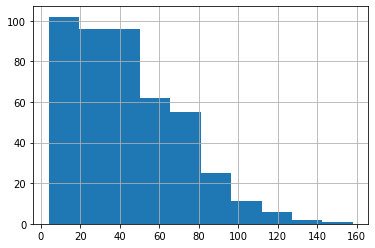

In [19]:
context_sizes['max_arg_length'].hist()

In [16]:
subset = context_sizes\
    [\
     #(context_sizes.len <= 5) &\
     (context_sizes.max_arg_length <= 50)\
    ]\
    .sort_values(by=['len'], ascending=True)
subset

,context,len,arg_lengths,mean_arg_length,std_arg_length,median_arg_length,max_arg_length
215,earth_is_flat,1,[6],6.0,0.000000,6.0,6
283,nuclear_power,1,[45],45.0,0.000000,45.0,45
368,rich_tax,1,[15],15.0,0.000000,15.0,15
425,open_source_software,2,"[10, 12]",11.0,1.000000,11.0,12
401,islam_threat,2,"[39, 47]",43.0,4.000000,43.0,47
...,...,...,...,...,...,...,...
151,surgery,10,"[8, 6, 33, 30, 4, 12, 14, 15, 4, 7]",13.3,9.829039,10.0,33
333,immigration,10,"[27, 7, 28, 49, 7, 6, 4, 5, 16, 13]",16.2,13.746272,10.0,49
77,live_streaming,10,"[10, 13, 15, 13, 6, 24, 8, 38, 26, 4]",15.7,10.050373,13.0,38
73,indian_independence,10,"[29, 36, 29, 40, 20, 16, 14, 32, 18, 48]",28.2,10.628264,29.0,48


In [17]:
subset['len'].values.sum()

1979

In [18]:
subset_sizes = subset[['len', 'context']].groupby(by=['len']).count()
subset_sizes

,context
len,
1,3
2,12
3,19
4,24
5,25
6,40
7,43
8,48
9,51


In [19]:
context_indices = list()
for l in range(3,11):
    subsubset = subset[subset['len']==l]
    #print(subsubset.shape)
    if l == 3 or l == 4:
        context_indices.extend(np.random.choice(subsubset.index, 7, replace=False))
    else:
        context_indices.extend(np.random.choice(subsubset.index, 6, replace=False))
        
print(len(context_indices))
print(context_indices)

50
[290, 411, 218, 141, 4, 379, 96, 22, 97, 39, 317, 41, 267, 227, 377, 249, 136, 297, 146, 29, 247, 285, 263, 170, 191, 145, 307, 386, 116, 380, 14, 230, 6, 355, 189, 237, 150, 234, 176, 340, 259, 106, 252, 202, 316, 217, 23, 112, 260, 440]


In [21]:
context_indices[context_indices.index(146)] = 147
#context_indices[context_indices.index(142)] = 143

In [16]:
subset.loc[context_indices]['max_arg_length'].hist()

NameError: name 'context_indices' is not defined

In [22]:
subset.loc[context_indices]

,context,len,arg_lengths,mean_arg_length,std_arg_length,median_arg_length,max_arg_length
290,cars,3,"[9, 4, 15]",9.333333,4.496913,9.0,15
411,urbanization,3,"[3, 9, 8]",6.666667,2.624669,8.0,9
218,merkel,3,"[6, 4, 4]",4.666667,0.942809,4.0,6
141,should_hydraulic_fracturing_be_used,3,"[3, 3, 34]",13.333333,14.613540,3.0,34
4,school_uniform,3,"[9, 6, 32]",15.666667,11.614168,9.0,32
379,law,3,"[9, 7, 4]",6.666667,2.054805,7.0,9
96,deep_learning,3,"[3, 33, 3]",13.000000,14.142136,3.0,33
22,is_golf_a_sport,4,"[7, 3, 6, 13]",7.250000,3.631460,6.5,13
97,india,4,"[5, 7, 7, 7]",6.500000,0.866025,7.0,7
39,marihuana,4,"[5, 39, 4, 28]",19.000000,15.016657,16.5,39


In [23]:
contexts = set(subset.loc[context_indices].context.values)

In [24]:
contexts

{'aliens',
 'america_citizenship',
 'apples',
 'bible',
 'bike_helmets',
 'black_lives',
 'britain',
 'cars',
 'child_marriage',
 'climate_crisis',
 'covid_is_a_cold',
 'decision_theory_important',
 'deep_learning',
 'dragon',
 'enviroment',
 'fish',
 'forests',
 'gaming',
 'gay',
 'gay_marriage',
 'german_language',
 'globalization',
 'guns',
 'homework',
 'house',
 'how_to_live',
 'india',
 'india_covid',
 'is_golf_a_sport',
 'is_social_media_good',
 'khan',
 'law',
 'lesbian',
 'lionel_messi_is_the_best_player',
 'marihuana',
 'marketing',
 'merkel',
 'pro_and_cons_of_view',
 'refugees',
 'rick_and_morty',
 'sausage',
 'school_uniform',
 'should_hydraulic_fracturing_be_used',
 'tattoos',
 'testing',
 'trade_network',
 'travelling_trains',
 'uber',
 'urbanization',
 'videogames'}

In [29]:
print(json.dumps(context_and_ids, indent=4))

{
    "is_golf_a_sport": [
        "Sbb04abe6-A43a15a87",
        "Sedab086a-A1b2b69e2",
        "Sbb04abe6-A259c1dbe"
    ],
    "guns": [
        "Sb26baaaa-A12208ca2",
        "Se336bc76-A7db3f984",
        "Se336bc76-A458aeab0"
    ],
    "house": [
        "S8b6b5263-A951f52dc",
        "S8b6b5263-A45e721c6",
        "Sd2402c6e-A21c0d37f"
    ],
    "decision_theory_important": [
        "Saafba5ea-A9f9feea6",
        "S58ef3225-A411bf761",
        "Se638a5c7-A952ded99"
    ],
    "dragon": [
        "Sf748a3c2-A1332cb73",
        "S7913c94f-Aabfd4541",
        "Seb320d78-A17f51d60"
    ],
    "gay_marriage": [
        "S6335c83f-Afec513a4",
        "S63356ea3-A4a6fee6c",
        "S63346f21-A57f57574"
    ],
    "bible": [
        "Se39fd920-A219380e9",
        "Se39fd920-A53827160",
        "S683276a4-A5989bb8e"
    ],
    "lionel_messi_is_the_best_player": [
        "S7bdf34f9-Affd53a29",
        "S41366f41-Ad66f0570",
        "S41366f60-Ad66f0570"
    ],
    "homework": [
     

In [25]:
context_and_ids = dict()
for c in contexts:
    clr_context = [a['arg_id'] for a in clr_predictions if a['query'] == c]
    #supmmd_context = [a['arg_id'] for a in supmmd_predictions if a['query'] == c]
    arg_ids = np.random.choice(clr_context, 3, replace=False).tolist()
    context_and_ids[c] = arg_ids    

In [26]:
for k in context_and_ids.keys():
    for id in context_and_ids[k]:
        in_supmmd = False
        for a in supmmd_predictions:
            if a['arg_id'] == id:
                in_supmmd = True
                break
        in_full_text = False
        for a in full_text:
            if a['arg_id'] == id:
                in_full_text = True
                break
        if not (in_supmmd and in_full_text):
            print(f'{id}')

In [27]:
with open('context_and_ids.json', 'w') as f:
    json.dump(context_and_ids, f)

In [20]:
with open('context_and_ids.json', 'r') as f:
    context_and_ids = json.load(f)

In [21]:
milad_list = dict()
milad_list_wo_ids = list()
for k in context_and_ids.keys():
    argids = set([a['arg_id'] for a in full_text if a['arg_id'] in context_and_ids[k]])
    cont = list()
    added = set()
    for a in full_text:
        if a['arg_id'] in argids and a['arg_id'] not in added:
            cont.append(a)
            added.add(a['arg_id'])
    #cont_wo_ids = [a['text'] for a in full_text if a['arg_id'] in context_and_ids[k]]
    milad_list[k]=  cont
    #milad_list_wo_ids.append(cont_wo_ids)
        

In [22]:
milad_list.keys()

dict_keys(['is_golf_a_sport', 'guns', 'house', 'decision_theory_important', 'dragon', 'gay_marriage', 'bible', 'lionel_messi_is_the_best_player', 'homework', 'forests', 'merkel', 'school_uniform', 'german_language', 'lesbian', 'america_citizenship', 'apples', 'black_lives', 'deep_learning', 'child_marriage', 'bike_helmets', 'covid_is_a_cold', 'fish', 'cars', 'trade_network', 'aliens', 'india', 'globalization', 'gay', 'climate_crisis', 'is_social_media_good', 'travelling_trains', 'pro_and_cons_of_view', 'marihuana', 'how_to_live', 'refugees', 'urbanization', 'india_covid', 'marketing', 'sausage', 'law', 'testing', 'videogames', 'khan', 'britain', 'rick_and_morty', 'gaming', 'enviroment', 'uber', 'should_hydraulic_fracturing_be_used', 'tattoos'])

In [32]:
with open('kp-input.json', 'w') as f:
    json.dump(milad_list_wo_ids, f, indent=4)

In [9]:
with open('kp-input-dict.json', 'w') as f:
    json.dump(milad_list, f, indent=4)

NameError: name 'milad_list' is not defined

# Annotation tasks

In [23]:
def print_task1(arg_id, context, all_ids):
    html_str = f'<p style="text-align:left">{context}</p><div style="border: solid black 1px; padding-left: 5px">'
    html_str += f'<table><tr>'
    cont_args = list()
    cont_ids = set()
    for a in full_text:
        if a['arg_id'] in all_ids and a['arg_id'] not in cont_ids:
            cont_args.append(a)
            cont_ids.add(a['arg_id'])
    for ft in cont_args:
        html_str += f'<td >{ft["text"]}</td>'
    html_str += f'</tr></table>'
    text = [a['text'] for a in full_text if a['arg_id']==arg_id][0]
    clr = [a for a in clr_predictions if a['arg_id']==arg_id][0]
    smmd = [a for a in supmmd_predictions if a['arg_id']==arg_id][0]
    #html_str += f'<span>{text}</span><hr>'
    html_str += f'<span style="font-weight: bold;">clr</span><br><span>{clr["paraphrased_1"][0]}<br>{clr["paraphrased_2"][0]}</span><hr>'
    html_str += f'<span style="font-weight: bold;">supmmd</span><br><span>{smmd["paraphrased_1"][0]}<br>{smmd["paraphrased_2"][0]}</span>'
    
    display_html(html_str+'</p>', raw=True)

In [85]:
def rand_task1():
    random_context = np.random.choice(list(context_and_ids.keys()))
    random_arg_snippet = np.random.choice(context_and_ids[random_context])
    print(random_context, random_arg_snippet)
    print_task1(random_arg_snippet, random_context, context_and_ids[random_context])

In [80]:
print_task1('S462448b6-A382aeb92', 'pro-environmental_behaviors', context_and_ids['pro-environmental_behaviors'])

"I will go ahead and make my case since the con has the first argument in each round. However, first I would like to lay down ground rules. The Pro (me) will have the responsibility of demonstrating why changes to behavior key to environmental sustainability, particularly in regards to climate change, however I will touch on other areas. The con will have presumption. In the first and second rounds both teams may bring up new arguments, in the third and fourth rounds, no new arguments, no exceptions. Fourth round, both teams will respond to any final arguments made previously, and conclude their arguments and show why they should win the debate. Additionally we must define several terms before we begin. 1) Behavior shall refer to how individuals and society act and function. 2) Change shall be defined as an alteration 3) Environmental Sustainability shall refer to maintenence of the factors and practices that contribute to preserving the quality of the environment, and its ability to support human life, on a long term basis. Moving on to my arguments. First Argument: Mitigating Climate Change requires behavioral changes Climate change is by far the greatest environmental issue we face in our world today. Climate change is caused by rising global tempertrues (ie Global Warming) which is caused by the accumulation of greenhouse gases (chiefly CO2) in the atmostphere. Human activity has been linked to the accumulation of Greenhouse gases in the atmostphere, through our consumption of fossil fuels. According to the UN, humans must severly limit CO2 emissions in order to combat climate change. This will mean that humans will need to end the practice of burning fossil fuels and transition to renewable energy. This would be a behavioral change as fossil fuels have been used to power societies since the industrial revolution. http://www.theguardian.com... Second Argument: Over consumption harms biodiversity, Biodiversity is key In our world today, fish stocks are being rapdily depleted thanks to overfishing. It is belived 70% of fish stocks have been depleted or exhausted. Bluefin Tuna stocks alone have dropped 96%. This is havgin serious harmful impacts on marine biodiversity. Biodiversity is vital to earth's ""life support systems"", and losing it has severe consequences of the long term sustainability of life on earth. In order to stop this loss of biodiversity, we must curtail our consumption of fish, thereby reducing demand and allowing stocks to replinish. http://www.seaweb.org... http://www.un.org...","Exactly!...It DOES NOT counter my argument infact, it enhances it and supports it 100%.. Limited Access or NOT. My point here to you stands firm when i say to you that Access to condoms and other contraceptives do lead to promiscuity and irresponsible sexual behaviors. ""Laws limiting teenagers access to contraceptive services and information fail to reduce sexual activity and increase the risk of unintended pregnancy and sexually transmitted diseases (STDs), according to two studies released this week "" The key term here is 'FAIL'... and according to www.google.com it is defined as neglect to do something. Therefore, access or not! it still has a major impact on teenagers.",I will answer your question: No i've never said this to myself but you never know someone else might have said it to themselves. People have different minds and they think differently so you may not say that to yourself but another person will. Take a good look at this site and read carefully https://guttmacher.org...


In [81]:
rand_task1()

ms_dhoni


"I agree that Dhoni is a spectacular batsman and captain but he has not been able to perform well in the recent series Various countries have different captains for different formats so why not the Indian team tries this once A suitable alternative is now available in Virat Kohli. He has leadership experience as captain of Indian youth teams and, more importantly, he's now the right age and has matured into a top-class batsman. Even more importantly, he has shown his mettle overseas by scoring runs in difficult arenas like the WACA and the Bullring This is the sort of inspiration India need to boost their overseas record. However, what they need even more is a proactive captain who can get the best out of his bowlers when playing in unfamiliar conditions Kohli needs to be brave as an India captain. Instead of placing defensive fields for Ishant Sharma's wayward deliveries he has to challenge him by deploying men designed to aid the bowler, as long as he maintains line and length. If Ishant can't oblige him, he has to find another bowler who can. While Dhoni's tendency to rely on batsmen making mistakes and getting themselves out works brilliantly in the shorter forms of the game, the ploy is often exposed as flawed when gritty opponents like McCullum mount a counterattack in Test matches Dhoni's latest injury may be fortuitous. It gives the selectors a chance to evaluate Kohli's leadership credentials in the one-day arena, and if he's successful, they should appoint him Test captain","VIRAT KOHLI,the emerging star of our Indian cricket team has brought various laurels for our country.his records proves to be quite appealing to the cricket lovers but as far as captaincy is concerned every team wants and need to have the senior player so that he can handle his team members well in every situation.every person doesn't have leadership qualities in him. i can justify it by taking the example of Master Blaster SACHIN TENDULKAR. indeed,he was the greatest player in the world of cricket who owns brilliant records but as a captain he never marked the expectations.India has lost nearly 60% matches under his captaincy. Secondly,virat kohli is considered to be the aggressive player on and off the field whose name is attached with the various issues regarding his conduct on the field but captain should be of the kind that he should handle all the situations cooly . India lost the match under Kohli's captaincy from pakistan in this Asia cup"


In [82]:
rand_task1()

trade_network


"The use of ICT and creating a network of professional experts enables learning and knowledge transfer between health workers and academics. In addition to the brain-drain, whereby skilled health professionals continue to emigrate from Zambia, Zambia also shows a slow rate of training of new health workers. Therefore the VDP provides a vital learning tool. VDP provides practical skills by healthcare workers to learn from first-hand experience while having access to a field of experts, or advisers, able to answer any questions. The quality of healthcare will be improved as workers in remote locations are given access to information and correct answers for diagnosis. A global pool of skills can be drawn upon, and utilised, when required.","The SIM card tax will provide positive knock-on effects for network expansion and improvement. By enforcing tax payment to individual users, mobile phone customers are able to demand better service quality and distribution. The public-sector have the obligation and responsibility to ensure tax can be justified so will encourage the development of the network – and if necessary use some of the taxes raised to pay for it.","Natural resources are a source of economic revenue for Africa. If managed well then this can become a genuine source of prosperity. Africa does not currently have developed secondary and tertiary sectors yet[1], most of the continent’s economics surrounds primary sector activity such as resource extraction and farming. The high commodity price of items such as gold, diamonds and uranium is therefore valuable for Africa’s trade. Profits from this trade have allowed countries to strengthen their economic position by reducing debt and accumulating external reserves, a prime example of this being Nigeria. [1] Maritz,J. ‘Manufacturing: Can Africa become the next China?’ How We Made Africa 24 May 2011 http://www.howwemadeitinafrica.com/manufacturing-can-africa-become-the-next-china/9959/"


In [83]:
rand_task1()

dragon


I will argue that Dragon Ball GT is better than Dragon Ball Super. Dragon Ball GT is better because it has a very interesting plot line and because Dragon Ball Super's animation is just bad. Just take a look at the horror show that is Dragon Ball Super's animation: http://pm1.narvii.com...; /> http://pm1.narvii.com...; />,"Defence: 1. Religion is belief, yes, but there is a dragon in your basement is not beleif.. It's fact. 2. The dragon is not a statement, 'There is a deagon in my basement' IS a statement. 3. No, I can't believe that there is a dragon based on lack of evidence as I don't beleive anything with less evidence, all the less NO evidence. 4. You have no proof that I'm bad at debating, all the less horrible at debating.","Hi, Im Adil Muhammad from Qatar. No, there aren't any dragins in your basement as yuo bave no evidence. Also, the burden of proof is on you, but you haven't proven that there is actually a dragon. You love dragons, But that doesn't mean that there should be a dragon in your basement. I too love dragon but have none in my house. I have no doubts.. Im sure of whatever Im saying"


In [84]:
rand_task1()

bangladesh


bangladesh Religious Violence: Compared to the thousand or more that died in the past riots that con has mentioned, the Muzaffarnagar violence resulted in only 63 deaths (not that they don't matter but compared to the thousands that died in previous riots this is not much), and this is at a time where the BJP is very prominent in Indian politics as my opponent mentioned. So the union will not have much of a problem in the long term. In any case Hindu-nationalist parties like the BJP will ultimately lose their power in the proposed union since minority religions like Islam will become larger, which is obviously not good for the BJP, and similar religious parties. My opponent might say that the BJP will prevent such a union from taking place, but I would like to remind him/her that in this debate it is assumed that the union takes place. My opponent stated this - "Besides, corruption itself is one of the reasons why the union won't fall through." Again, it is assumed that the union takes place. Terrorists in India: My opponent mentioned that India isn't "decisive enough to take a stand against the extremists who plague THEIR OWN LAND" In the past there have been rebellions and insurgents too, like Khalistan rebels in Punjab. They were dealt with by the Indian army. Even the Maoist insurgency that my opponent mentioned has been on sharp decline since 2010. http://en.wikipedia.org... So this proves that India is capable of dealing with insurgencies and terrorism, the islamists are no different. So the proposed Union will be able to deal with the Islamists, the same way India dealt with these insurgents. My opponent has requested that I state new arguments for this round, I shall gladly do so. I will be focusing on Pakistan. Pakistan and internal violence: Pakistan has always considered India as its number one enemy. This presence of hostilities has always been the reason for Pakistan to be spending money for making larger armed forces, rather than spending it on development. Terrorists/Insurgents like Al Qaeda and the Baluchistani Insurgents wreck havoc on the country while the government is too concerned with politics with India. Pakistan's own allies, the US is drone striking Pakistani territories and killing civilians. The US became allied with Pakistan because India had close ties with USSR in the cold war era (and still continues close ties with Russia), if the US was not allied with Pakistan, the Pakistani government would never have allowed such drone strikes, thus the historical tension with India indirectly led to the US drone strikes. In the proposed Union, the Insurgents will be defeated as tensions cease to exist between India and Pakistan and the focus of the governments can be on the Insurgents. Also the US will not be allowed to use their drones since it is more likely that the union will have the political viewpoints of India (since it is larger and at the center) and not Pakistan. The US may stop themselves as they do not want to anger a much larger country. http://www.dnaindia.com... http://en.wikipedia.org... The Threat of Nuclear War: This is perhaps the biggest concern in the region. India and Pakistan, which together hold more than 14% or 1/7 of the worlds population, are nuclear armed. The two countries are engaging in an arms race (similar to the cold war but a smaller scale) http://tribune.com.pk... If the two countries EVER exchange nuclear weapons it could be catastrophic to the world, due to nuclear winter/famine and of course the radiation. http://www.telegraph.co.uk... The two countries have come very close to having a nuclear war http://en.wikipedia.org... http://news.bbc.co.uk... As stated in the article, the Pakistani PM refused to renounce the first use of nuclear weapons Neither Pakistan nor India has signed the non proliferation treaty, so they don't plan to abandon Nuclear weapons anytime soon. In the proposed Union there will be no such threats since the tensions between India and Pakistan don

In [86]:
rand_task1()

nuclear_energy Sb4dd79cd-Ae87a8038


"This is going to be a simple Pro Nuclear Energy vs Con Nuclear Energy. No specific resolution, just the broad subject of using nuclear energy. Burden of Proof - The BoP falls equally on both debaters to support and defend their arguments while refuting their opponent's. For example, Con can focus on negative effects to the environment, safety issues, or better alternatives rendering Nuclear obsolete, but Con cannot just disagree with everything Pro puts up (and vise versa). I will go ahead and present some definitions. Unless Con finds these definitions to be abusive, they are to be accepted. If Con finds them abusive, Con is free to present alternative definitions, but then it will be up to the voters to agree if my definitions are abusive or not. Nuclear energy (as it pertains to this debate) - The gathering of energy from nuclear fission or nuclear fusion to use in commercial purposes (such as electricity). Nuclear fission - A nuclear reaction in which a heavy nucleus splits spontaneously or on impact with another particle, with the release of energy. [1] Nuclear fusion - A nuclear reaction in which atomic nuclei of low atomic number fuse to form a heavier nucleus with the release of energy. [2] Con may present any additional definitions that they choose and may start debating in their R1, however, they are also free to pass it back to me to start in my R2. Additional definitions may be added as needed throughout the entire debate. [1] https://www.google.com...= [2] https://www.google.com...="


# Create annotation files

In [26]:
random_context_key = np.random.choice(list(context_and_ids.keys()))
random_context_key

'gay'

In [27]:
def inst_task1(context_key, save=True):
    ft_arguments = [a for a in full_text if a['arg_id'] in context_and_ids[context_key]]
    #print(ft_arguments)
    records = [
        {
        'argument1': ft_arguments[0]['arg_id'],
        'argument2': ft_arguments[1]['arg_id'],
        'argument3': ft_arguments[2]['arg_id'],
        },
        {
        'argument1': ft_arguments[0]['text'],
        'argument2': ft_arguments[1]['text'],
        'argument3': ft_arguments[2]['text'],
        }
    ]
    
    random_arg_id = np.random.choice(context_and_ids[context_key])
    clr = [a for a in clr_predictions if a['arg_id'] == random_arg_id and a['query']==context_key][0]
    records.extend([
        {
        'argument1': 'Snippet A',
        'argument2': clr["paraphrased_1"][0] + ' ' + clr["paraphrased_2"][0],
        'argument3': '---',
        'meta': clr['snippet_id']
        },
        {
        'argument1': '',
        'argument2': '',
        'argument3': '',
        },
        {
        'argument1': "-" * 50,
        'argument2': "-" * 50,
        'argument3': "-" * 50,
        }        
    ])
    
    supmmd = [a for a in supmmd_predictions if a['arg_id'] == random_arg_id and a['query']==context_key][0]
    records.extend([
        {
        'argument1': 'Snippet B',
        'argument2': supmmd["paraphrased_1"][0] + ' ' + supmmd["paraphrased_2"][0],
        'argument3': '---',
        'meta': supmmd['snippet_id']
        },
        {
        'argument1': '',
        'argument2': '',
        'argument3': '',
        },
        {
        'argument1': "-" * 50,
        'argument2': "-" * 50,
        'argument3': "-" * 50,
        }        
    ])
    
    baseline = [a for a in baseline_predictions if a['arg_id'] == random_arg_id and a['query']==context_key][0]
    records.extend([
        {
        'argument1': 'Snippet C',
        'argument2': baseline["paraphrased_1"][0] + ' ' + baseline["paraphrased_2"][0],
        'argument3': '---',
        'meta': baseline['snippet_id']
        },
        {
        'argument1': '',
        'argument2': '',
        'argument3': '',
        }
    ])
    
    records.extend([
        {
        'argument1': "'"+ ("=" * 50),
        'argument2': "'"+ ("=" * 50),
        'argument3': "'"+ ("=" * 50),
        },
    ])
    
    df = pd.DataFrame.from_records(records)
    if save:
        with pd.ExcelWriter("path_to_file.xlsx", engine='xlsxwriter') as writer:
            sheetname='sheet 1'
            df.to_excel(writer, index=False, sheet_name=sheetname)
            form = writer.book.add_format()
            form.set_text_wrap()
            form.set_align('left')
            form.set_align('top')

            worksheet = writer.sheets[sheetname]  # pull worksheet object
            for idx, col in enumerate(df):  # loop through all columns
                series = df[col]
                max_len = 80
                worksheet.set_column(idx, idx, max_len, form)  # set column width
            #writer.save()

    return df
        
inst_task1(random_context_key)

,argument1,argument2,argument3,meta
0,S847e73c4-A5ccb0c9f,S1d71c53c-A5431b16,S1d71c55b-A6ddc32f7,NaN
1,"Oh man, this is a five-round debate. Your sour...","Hello, I don't think that there is so much hea...",Gays.... ya or nay. I say nay as in the flambo...,NaN
2,Snippet A,My friends say that it depends on the health o...,---,UzFkNzFjNTNjLUE1NDMxYjE2K2dheStjbHI=
3,,,,NaN
4,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,NaN
5,Snippet B,If there is any gay people out there reading t...,---,UzFkNzFjNTNjLUE1NDMxYjE2K2dheStzdXBtbWQ=
6,,,,NaN
7,----------------------------------------------...,----------------------------------------------...,----------------------------------------------...,NaN
8,Snippet C,I don't believe God hates gay people because t...,---,UzFkNzFjNTNjLUE1NDMxYjE2K2dheStiYXNlbGluZQ==
9,,,,NaN


In [28]:
dfs = list()
for k in list(context_and_ids.keys()):
    dfs.append(inst_task1(k))

In [43]:
np.reshape([0,1,2,3,4,5,6,7,8,9], (2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [27]:
new_dfs = list()
for i in range(10):
    new_dfs.append(dfs[i:i+5])

In [28]:
with pd.ExcelWriter("task1.xlsx", engine='xlsxwriter') as writer:
    for idx, dfs_ in enumerate(new_dfs):
        df = pd.concat(dfs_, axis=0)
        sheetname = f'sheet {idx}'
        df.to_excel(writer, index=False, sheet_name=sheetname)
        form = writer.book.add_format()
        form.set_text_wrap()
        form.set_align('left')
        form.set_align('top')

        worksheet = writer.sheets[sheetname]  # pull worksheet object
        for idx, col in enumerate(df):  # loop through all columns
            series = df[col]
            max_len = 80
            if idx < 3:
                worksheet.set_column(idx, idx, max_len, form)  # set column width
            else:
                worksheet.set_column(idx, idx, 5)  # set column width

In [18]:
for idx, col in enumerate(df):
    print(idx, col)

0 argument1
1 argument2
2 argument3
3 meta


In [39]:
dataframes = list()
for context_key in context_and_ids.keys():
    #ft_arguments = [a for a in full_text if a['arg_id'] in context_and_ids[context_key]]
    clr = np.random.choice([a for a in clr_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    supmmd = np.random.choice([a for a in supmmd_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    baseline = np.random.choice([a for a in baseline_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    
    records = ([
        {
            'Snippet A': clr["snippet_id"],
            'Snippet B': supmmd["snippet_id"],
            'Snippet C': baseline["snippet_id"],
        },
        {
            'Snippet A': clr["paraphrased_1"][0] + ' ' + clr["paraphrased_2"][0],
            'Snippet B': supmmd["paraphrased_1"][0] + ' ' + supmmd["paraphrased_2"][0],
            'Snippet C': baseline["paraphrased_1"][0] + ' ' + baseline["paraphrased_2"][0],
        },
        {
            'Snippet A': 'Diversity score:',
            'Snippet B': '',
            'Snippet C': '---',
        },
        {
            'Snippet A': "'"+ ("=" * 50),
            'Snippet B': "'"+ ("=" * 50),
            'Snippet C': "'"+ ("=" * 50),
        }
    ])
    dataframes.append(pd.DataFrame.from_records(records))

dfs = list()
for i in range(6):
    dfs.append(dataframes[i:i+25])
    
with pd.ExcelWriter("task2.xlsx", engine='xlsxwriter') as writer:
    for idx, dfs_ in enumerate(dfs):
        df = pd.concat(dfs_, axis=0)
        sheetname = f'sheet {idx}'
        df.to_excel(writer, index=False, sheet_name=sheetname)
        form = writer.book.add_format()
        form.set_text_wrap()
        form.set_align('left')
        form.set_align('top')

        worksheet = writer.sheets[sheetname]  # pull worksheet object
        for idx, col in enumerate(df):  # loop through all columns
            series = df[col]
            max_len = 80
            worksheet.set_column(idx, idx, max_len, form)  # set column width

In [38]:
dataframes = list()
for context_key in context_and_ids.keys():
    #ft_arguments = [a for a in full_text if a['arg_id'] in context_and_ids[context_key]]
    clr = np.random.choice([a for a in clr_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    supmmd = np.random.choice([a for a in supmmd_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    baseline = np.random.choice([a for a in baseline_predictions if a['arg_id'] in context_and_ids[context_key] and a['query']==context_key])
    
    records = ([
        {
            'Snippet A': clr["snippet_id"],
            'Snippet B': supmmd["snippet_id"],
            'Snippet C': baseline["snippet_id"],
        },
        {
            'Snippet A': clr["paraphrased_1"][0] + ' ' + clr["paraphrased_2"][0],
            'Snippet B': supmmd["paraphrased_1"][0] + ' ' + supmmd["paraphrased_2"][0],
            'Snippet C': baseline["paraphrased_1"][0] + ' ' + baseline["paraphrased_2"][0],
        },
        {
            'Snippet A': 'Diversity score:',
            'Snippet B': '',
            'Snippet C': '---',
        },
        {
            'Snippet A': "'"+ ("=" * 50),
            'Snippet B': "'"+ ("=" * 50),
            'Snippet C': "'"+ ("=" * 50),
        }
    ])
    dataframes.append(pd.DataFrame.from_records(records))

In [35]:
dataframes[0]

,Snippet A,Snippet B,Snippet C
0,U2JiMDRhYmU2LUEyNTljMWRiZStpc19nb2xmX2Ffc3Bvcn...,U2VkYWIwODZhLUExYjJiNjllMitpc19nb2xmX2Ffc3Bvcn...,U2VkYWIwODZhLUExYjJiNjllMitpc19nb2xmX2Ffc3Bvcn...
1,I have no bad feelings towards you for favorin...,Golf is not a sport based on my definition. Yo...,Golfing is not vigorous activity. Golf is not ...
2,Diversity score:,,---
3,'=============================================...,'=============================================...,'=============================================...


In [69]:
def print_arg(arg, hl=None):
    html_str = f'<p style="text-align:right">{arg["arg_id"]}</p><div style="border: solid black 1px; padding-left: 5px">'
    for idx, s in enumerate(arg['sentences']):
        if hl is None:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if s in arg["excerpt"] else "white"}">{s}</span><br>'
        else:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if idx in hl else "white"}">{s}</span><br>'
    display_html(html_str+ '</div>', raw=True)
    #return html_str+ '</div>'
    
def print_context(context):
    html_str = f"""<table><tr><th style="text-align: center;">clr</th><th style="text-align: center;">supmmd</th></tr>"""
    sa = supmmd_arg_contexts[context]
    ca = clr_arg_contexts[context]
    
    for a in sa:
        x = [arg for arg in ca if arg['arg_id'] == a['arg_id']][0]
        html_str += f"""
            <tr>
                <td style="text-align: left;">{print_arg(x, x.excerpt_indices)}</td>
                <td style="text-align: left;">{print_arg(a, a.excerpt_indices)}</td>
            </tr
        """
    display_html(html_str+'</table>', raw=True)

In [70]:
for a in [c for c in clr_predictions if c['query']=='abotion']:
    print_arg(a)

Sd0e40cfa-Ab6191894 01 Please spare me your outrage. 02 I'm tired of hearing the same old argument trotted out again and again. 03 You said yourself that this round is for fcats [sic]. 04 Plain, empirical facts. 05 You 'ABOTION in the eyes of god is hate you should never kill a creation of GOD i konw i would never kill my baby and neither should anyone else you need to love the baby or if you dont dont have kids .... ' I'm just going to dissect this and pull it apart. 06 ABOTION in the eyes of god is hate' As I said above, the mind of 'God' is unknowable. you should never kill a creation of GOD ' You need to prove a 'God' exists before this argument approaches anything like validity. i konw i would never kill my baby' You really need to understand that not being born is not the same thing as killing, and that pretty well invalidates your whole argument for this round. neither should anyone else' You can't just go marching in and say 'Right, I think that abortion is wrong, now you go and stop having them.' you need to love the baby' Not disputing this, but this has no relevance to your argument 'or if you dont dont have kids ....' You are now doing nothing more than rambling. 07 I challenge Con to now show why, in fact 'ABOTION in the eyes of god is hate'. 08 And let's see if she can actually spell it right.

Sd0e40cfa-A124008ac 01 Again, I will dissect my opponent's argument- in painstaking detail. 02 Abotion to people is different not everyone thinks abortion is good and some people think it is' Correct. but to god it is not because you are killing something he made and put in the mother of the child' Again, you must first prove God exists for this argument to have any validity. and then the woman who doesn't want it and goes and kills it ' This is an unfair characterization, for the following reasons. 03 Either the woman chooses to have sexual intercourse unprotected with a man or 2. 04 The woman cannot have protected sex, therefore she did not choose to have the baby, or 3. 05 The woman cannot afford the baby. 06 Unrelated to the previous, that not being born is not the same as killing. 07 Is bringing a child into the world, who will have a life of suffering fair? 08 When you think of GOD you probley think what that is a mith but its not God makes every baby that is born You have now contradicted yourself. 09 I quote from above in your round 3 argument 'you are killing something he made and put in the mother of the child'. 10 Well, which is it? 11 Does a God make babies, or does he not? less babys because woman think the best thing to do is abort that baby ' I see what you mean here, but this is irrelevant. 12 I think the 2000 babies born every day in the UK puts the lie to this. its not the best thing to do when girl gets pregnet you have many options and most girls go for abotion ' In fact, most 'girls' go and have the baby any way, and then the baby is brought up in poverty, turns to crime, votes UKIP etc etc. but there is more then that you can put the baby up for adoption there are many couples who would love to adopt a baby' Well how about the third world countries, where most women have more than enough children to deal with. so ladies font think there is only one option you have many to choose from' Not true. 13 In fact, because of people like you who refuse to give access to abortion there is a growing rate of teenage births, and education about abortion. 14 You're welcome to take me up on my challenge to spell the subject matter right any time.

Sea5d090a-Ac6f0a78e 01 I thank my opponent for starting this debate. 02 With the failure of my opponent to post a contention for round one, I shall attempt to elucidate the resolution with definitions and contentions. 03 The resolution states, Abotion is not a dead baby. 04 (I assume abotion is supposed to be abortion, for my opponent stated the word 'abortion' in round 1) Abortion is in fact not a dead baby. 05 Abortion is defined as any of various surgical methods for terminating a pregnancy. 06 Because abortion is not a dead baby, my side (Pro) is supported by the statement. 07 The resolution further states, Babies arent babies at the time of Abortions. 08 Babies in fact are not recognized as babies at the time of abortion. 09 A baby is defined as a newborn or very young child. 10 Because a baby is classified as a newborn/very young child, that means a baby is out of the mother's womb, and since abortions only take place when the fetus is in the womb, I have shown that in fact the fetus is not known as a baby at the time of abortions. 11 I believe I have cleared it up, but I would hope my opponent exemplifies her points further in the following round. 12 People say that at the time of Abortions, that they are not yet babies This does not present an argument, so no rebuttal is necessary. 13 I have shown the statements in the resolution to support my side. 14 I urge a Pro vote.

Sd0e40cfa-Acfa53560 01 OK, so I agree to abide by the rules of this debate set by my opponent, and I will comply, but first- Rebuttal 'but to us christian people' I will tackle this in a later round, as my security software will not let me research this further. 02 to god' Assumptions needed A being, or power that is known as 'God' exists. 03 Said being is omnipotent, omniscient etc. 04 Now if this being is omniscient, it is impossible to know the mind of 'God'. 05 Therefore, the statement made is illogical, and therfore untrue. 06 Opinon It makes not the slightest shred of difference in this debate, but I am pro-choice for abortion, that means I am pro the woman having a choice to abort her baby.

Sd0e40cfa-A57e6331f 01 So, summing up my opponent's arguments. 02 You are killing something that god made. 03 I then replied to that by saying a) You must first prove god exists. b) The mind of god is unknowable. c) Killing is not the same as not being born. 04 People will think that abortion is the only way to go. 05 I said that the very example of 2000 babies being born every day in the UK disproves that. 06 Therefore, my opponent has made only 2 arguments, both of which have been conclusively rebutted, and therefore, as she made no mention of BoP, she is Pro, therefore I automatically win the debate because none of her arguments stand. 07 (By the way, notice that my opponent went the whole debate without spelling abortion properly.)

S86fd338d-A92bfbaa3 01 Con initiated and argued first. 02 That's confusing, so I'll just remind people thateven though I'm refutingI am Pro. 03 Con had the burden of proof, but he never really argued for the resolution. 04 He didn't meet his burden of proof. 05 Vote Pro. 06 Even though I didn't have the burden of proof, I pointed out that there are times when abortion can solve a problem. 07 Therefore, the resolution is defeated. 08 Vote Pro. 09 Con forfeited.

S86fd338d-Af8c444e6 01 Firstly, it goes without saying that abortion is terrible procedure. 02 I am personally against abortions, but I understand in some situations in which abortion maybe seen as an appropiate option. 03 I am a firm believer in God all that goes with it, but in my case it's not so much a religion belief as it is a personal belief. 04 I don't fully grasp the idea of harming an unborn soul because one would simply not want the responsibility. 05 There are many other options as opposed to aborting that are also much healthier. 06 As I have said many times before, To each their own.